### 1.0 Import Libraries

In [1]:
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

### 2.0 Use BeautifulSoup and Urlopen to Retrieve Data

In [2]:
list_of_years = [2018, 2019]

list_data = []

for year in list_of_years:
    
    url = f'https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html'

    html = urlopen(url)

    soup = BeautifulSoup(html)
    
    headers = [th.getText() for th in soup.findAll('tr')[0].findAll('th')]

    headers = headers[1:] # columns
    
    rows = soup.findAll('tr')

    player_stats_1 = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))] # rows
    
    tmp_df = pd.DataFrame(player_stats_1, columns=headers)
    
    tmp_mat = tmp_df.values
    
    list_data.append(tmp_mat)

### 2.2 Build Full DF

In [3]:
full_data = np.array(list_data[0])

for list_i in list_data[1:]:
    
    tmp_data = np.array(list_i)
    
    full_data = np.vstack((full_data, tmp_data))
    
    
full_data.shape

(1426, 28)

In [4]:
og_df = pd.DataFrame(full_data[1:], columns=headers)

og_df.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Álex Abrines,SG,24,OKC,75,1134,9.0,.567,.759,.158,...,,1.3,1.0,2.2,.094,,-1.9,0.4,-1.5,0.1
1,Quincy Acy,PF,27,BRK,70,1359,8.2,.525,.800,.164,...,,-0.1,1.1,1.0,.036,,-2.6,0.1,-2.5,-0.2
2,Steven Adams,C,24,OKC,76,2487,20.6,.630,.003,.402,...,,6.7,3.0,9.7,.187,,1.7,-0.6,1.1,2.0
3,Bam Adebayo,C,20,MIA,69,1368,15.7,.570,.021,.526,...,,2.3,1.9,4.2,.148,,-1.1,0.7,-0.4,0.6
4,Arron Afflalo,SG,32,ORL,53,682,5.8,.516,.432,.160,...,,-0.1,0.2,0.1,.009,,-3.8,-1.5,-5.4,-0.6


### 2.3 Create DataFrame and Group By Player Name

In [5]:
og_df = og_df.apply(pd.to_numeric, errors='ignore')

# Converts ordinal variable (Pos) into numeric
og_df['Pos'] = og_df['Pos'].map({'PG': 1, 'SG': 2, 'SF': 3, 'PF': 4, 'C': 5})

new_df = og_df.groupby(by='Player').mean()

new_df = new_df.round(3) # round to 3 decimal places

### 2.4 Control Size of Player Sample by Minimum Minutes Played

In [6]:
min_mins_played = 1000

new_df = new_df[new_df['MP'] > min_mins_played]

new_df = new_df.reset_index(drop=False)

new_df.head()

,Player,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Aaron Gordon,4.0,22.5,68.0,2271.0,15.8,0.534,0.364,0.251,5.10,...,NaN,1.35,2.65,4.00,0.083,NaN,0.60,-0.15,0.45,1.40
1,Al Horford,5.0,31.5,70.0,2125.0,18.9,0.590,0.290,0.145,5.75,...,NaN,4.25,3.35,7.65,0.173,NaN,2.85,1.95,4.75,3.65
2,Al-Farouq Aminu,4.0,27.5,75.0,2182.0,12.6,0.545,0.527,0.214,5.25,...,NaN,1.95,3.00,5.00,0.109,NaN,-0.30,0.85,0.55,1.40
3,Alex Len,5.0,24.5,73.0,1469.5,18.3,0.593,0.162,0.472,11.85,...,NaN,2.70,1.15,3.85,0.127,NaN,0.30,-0.80,-0.45,0.55
4,Allen Crabbe,2.0,25.5,59.0,1665.0,10.0,0.538,0.669,0.156,1.40,...,NaN,0.80,1.20,2.00,0.053,NaN,-1.20,-0.55,-1.75,0.25


In [7]:
df = new_df.copy()

### 2.5 Convert to Numbers and Drop Unnecessary Columns

In [8]:
# Keep specific columns
columns_to_keep = ['Player', 'Pos', 'MP', 'Age', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
                   'AST%', 'TOV%', 'USG%', 'STL%', 'BLK%', 'DBPM', 'WS']

df = pd.DataFrame(new_df[columns_to_keep], columns=columns_to_keep)

### 2.6 Convert to Base English ASCII Letters

In [9]:
import unidecode

df['Player'] = df['Player'].apply(lambda x: unidecode.unidecode(x))

### 3.0 Import 'DRAYMOND' data from FiveThirtyEight

In [10]:
import sys

sys.path.append('/Users/seanmcalevey/')

In [11]:
directory = '/Users/seanmcalevey/documents/github/nbaplayerclustering/fivethirtyeight_data/nba-draymond/'

df1 = pd.read_csv(directory + 'draymond.csv', sep=',')

### 3.1 Limit DRAYMOND to Players with >500 Poss.

In [12]:
min_possessions = 500

df1 = df1[df1['season'] >= min(list_of_years)]

df1 = df1[df1['possessions'] > min_possessions]

### 3.2 Build Total DF

In [13]:
total_df = pd.merge(df, df1, left_on='Player', right_on='player')

In [14]:
total_df = total_df.drop(['player', 'season', 'possessions'], axis=1)

In [15]:
total_df = total_df[['Player', 'Pos', 'MP', 'Age', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'AST%', 'TOV%',
       'USG%', 'STL%', 'BLK%', 'DBPM', 'DRAYMOND', 'WS']]

In [16]:
total_df = total_df.groupby('Player').mean()

total_df = total_df.reset_index()

In [17]:
print('There are ' + str(len(total_df['Player'].unique())) + ' unique players who qualify for this clustering.')

print('There are ' + str(len(total_df)) + ' total player names in this dataframe.')

There are 273 unique players who qualify for this clustering.
There are 273 total player names in this dataframe.


### 3.3 Convert Pandas DataFrame into Matrix for Processing

In [18]:
df_as_matrix = total_df.values

### 4.0 Import and Scale Vectors

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
standard_scaler = StandardScaler()

scaled_vectors = standard_scaler.fit_transform(df_as_matrix[:,1:-1])

### 4.1 Import PCA and Reduce Dimensionality

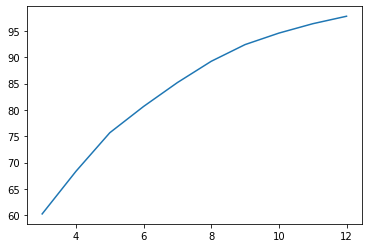

In [21]:
from sklearn.decomposition import PCA

search_space = np.arange(3,13)

list_of_ev = []

for n_components in search_space:
    
    pca = PCA(n_components)

    dim_reduction = pca.fit_transform(scaled_vectors)

    explained_variance_1 = round(100*sum(pca.explained_variance_ratio_), 3)
    
    list_of_ev.append(explained_variance_1)

plt.plot(search_space, list_of_ev)

plt.show()

In [22]:
n_components = 8

pca = PCA(n_components)

dim_reduction = pca.fit_transform(scaled_vectors)

reduced_df = total_df.copy()

for i in range(n_components):

    reduced_df[f'PCA{i+1}'] = [dim_reduction[x][i] for x in range(len(dim_reduction))]

### 4.2 Scale and Cluster with KMeans

In [23]:
# Scale before clustering:

from sklearn.cluster import KMeans

scaler = StandardScaler()

dim_reduction = scaler.fit_transform(dim_reduction)

### 4.3 Graph Silhouette_Scores

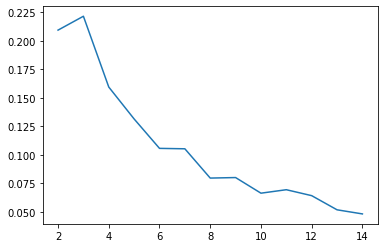

In [24]:
from sklearn.metrics import silhouette_score

num_clusters_list = np.arange(2,15)

sil_score = []

for num_clusters in num_clusters_list:

    kmeans = KMeans(num_clusters, random_state=42)

    clusters = kmeans.fit_transform(dim_reduction)

    sil_score.append(silhouette_score(clusters, kmeans.labels_))
    

plt.plot(num_clusters_list, sil_score)

plt.show()

### 4.4 Set Num_Clusters According to Silhouette_Score

In [25]:
num_clusters = 6

kmeans = KMeans(num_clusters, random_state=42)

clusters = kmeans.fit_predict(dim_reduction)

In [26]:
reduced_df['Cluster'] = clusters

reduced_df = reduced_df.reset_index(drop=True)

### 5.3 Build Averages Table to See Clusters Grouped

In [27]:
averages_df = reduced_df.groupby('Cluster').mean()

averages_df = averages_df.reset_index(drop=False)

In [28]:
averages_df = averages_df.apply(lambda x: round(x, 3))

In [29]:
averages_df = averages_df[['Cluster', 'Pos', 'MP', 'Age', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'AST%', 'TOV%', 'USG%',
       'STL%', 'BLK%', 'DBPM', 'DRAYMOND']]

In [30]:
averages_df['Cluster'] = averages_df['Cluster'].apply(lambda x: int(x))

averages_df = averages_df.sort_values(by='Pos', ascending=True)

In [31]:
averages_df.sort_values(by='Pos', ascending=True)

,Cluster,Pos,MP,Age,TS%,3PAr,FTr,ORB%,DRB%,AST%,TOV%,USG%,STL%,BLK%,DBPM,DRAYMOND
2,2,1.817,1514.868,26.100,0.521,0.315,0.248,2.667,12.253,22.734,13.724,23.578,1.432,0.847,-1.127,-0.635
3,3,2.163,1479.833,25.317,0.543,0.351,0.255,3.557,13.978,16.678,13.433,18.902,2.309,1.682,0.898,-0.089
0,0,2.707,1775.059,26.257,0.568,0.492,0.193,2.847,12.653,10.709,10.085,18.011,1.340,1.001,-0.469,-0.434
1,1,2.839,2487.742,25.694,0.574,0.303,0.312,4.644,18.377,23.682,12.219,27.781,1.727,2.129,0.552,0.516
5,5,3.725,1474.198,28.849,0.543,0.384,0.197,5.139,17.592,11.156,12.443,16.906,1.345,2.506,0.416,0.869
4,4,4.852,1686.074,24.000,0.611,0.048,0.418,11.742,23.425,9.118,13.289,18.230,1.286,3.548,0.321,0.978


### 5.0 Linear Discriminant Analysis w/ Clusters as Targets

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

num_components = 3

scale = StandardScaler() # scale before LDA

dim_reduction = scale.fit_transform(dim_reduction)

lda = LinearDiscriminantAnalysis(n_components=num_components)

X = dim_reduction

y = clusters

discriminated = lda.fit_transform(X, y)

explained_variance = round(100*sum(lda.explained_variance_ratio_), 3)

explained_variance

71.429

In [33]:
reduced_df['LDA1'] = [discriminated[x][0] for x in range(len(dim_reduction))]

reduced_df['LDA2'] = [discriminated[x][1] for x in range(len(dim_reduction))]

reduced_df['LDA3'] = [discriminated[x][2] for x in range(len(dim_reduction))]

### 5.1 Graph Silhouette_Score for KMeans 

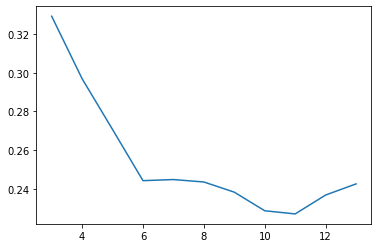

In [34]:
from sklearn.metrics import silhouette_score

scaler = StandardScaler()

num_clusters_list = np.arange(3,14)

sil_score = []

for num_clusters in num_clusters_list:
    
    scaled = scaler.fit_transform(discriminated)

    kmeans = KMeans(num_clusters, random_state=42)

    clusters = kmeans.fit_transform(scaled)

    sil_score.append(silhouette_score(clusters, kmeans.labels_))
    
plt.plot(num_clusters_list, sil_score)

plt.show()

### 5.2 KMeans Clustering

In [35]:
num_clusters_2 = 7

scaler = StandardScaler()

reduced = reduced_df[['LDA1', 'LDA2', 'LDA3']]

red_scaled = scaler.fit_transform(reduced)

k_cluster = KMeans(num_clusters_2, random_state=42)
    
clusters = k_cluster.fit_predict(red_scaled)

In [36]:
reduced_df['Cluster_2'] = clusters

### 5.3 2nd Cluster Averages Table

In [37]:
averages_dict_2 = {}

total_per_cluster_2 = {}

for cluster in reduced_df['Cluster_2'].unique():
    
    cluster_group = reduced_df[reduced_df['Cluster_2'] == cluster]
    
    averages_dict_2[cluster] = np.mean(cluster_group)
    
    total_per_cluster_2[cluster] = len(cluster_group)

In [38]:
averages_df_2 = pd.DataFrame.from_dict(averages_dict_2, orient='index', 
                                       columns=reduced_df.drop('Player',axis=1).columns)

averages_df_2['Total Players'] = total_per_cluster_2.values()

averages_df_2 = averages_df_2.apply(lambda x: round(x, 3))

averages_df_2 = averages_df_2[['Cluster_2', 'Pos', 'MP', 'Age', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'AST%',
                               'TOV%', 'USG%', 'STL%', 'BLK%', 'DBPM', 'DRAYMOND', 'Total Players']]

averages_df_2['Cluster_2'] = averages_df_2['Cluster_2'].apply(lambda x: int(x))

averages_df_2 = averages_df_2.sort_values(by='Pos', ascending=True)

averages_df_2.sort_values(by='Pos', ascending=True)

,Cluster_2,Pos,MP,Age,TS%,3PAr,FTr,ORB%,DRB%,AST%,TOV%,USG%,STL%,BLK%,DBPM,DRAYMOND,Total Players
6,6,1.452,1522.081,27.218,0.521,0.311,0.244,2.317,11.660,26.979,14.078,24.549,1.768,0.903,-0.748,-0.579,31
5,5,1.724,1312.310,25.614,0.520,0.372,0.217,2.778,12.047,16.725,14.414,17.866,2.045,1.235,0.440,-0.168,35
3,3,2.224,2387.052,24.819,0.564,0.313,0.330,3.404,15.453,26.216,12.741,28.664,1.572,1.645,-0.204,0.025,29
2,2,2.896,1504.718,27.553,0.549,0.519,0.166,3.077,13.740,10.173,10.632,15.920,1.441,1.382,0.030,-0.014,72
0,0,3.188,2159.181,26.315,0.573,0.395,0.226,3.797,15.116,13.559,11.017,21.205,1.341,1.620,-0.169,0.082,46
1,1,3.667,1449.312,25.266,0.560,0.243,0.301,6.203,18.832,12.105,12.322,19.925,1.592,2.225,0.116,0.206,32
4,4,4.875,1705.982,24.857,0.615,0.044,0.411,12.104,23.963,8.847,13.214,18.446,1.301,3.750,0.354,1.008,28


### 5.4 Find Cluster Centers and Calculate the Closest Player to Each

In [39]:
cluster_centers = k_cluster.cluster_centers_.tolist()

example_players = []

for x, y, z in cluster_centers:
    
    min_dist = 1000
    
    player = str()
    
    tmp_df = reduced_df.copy()
    
    tmp_df['L2_dist'] = np.sqrt( ( (tmp_df['LDA1'] - x) ** 2) + ( (tmp_df['LDA2'] - y) ** 2) + 
                               ( (tmp_df['LDA3'] - z) ** 2) ) # euclidian dist (l2)
    
    for i in range(len(tmp_df)):
        
        if tmp_df.loc[i,'L2_dist'] < min_dist:
            
            min_dist = tmp_df.loc[i, 'L2_dist']
            
            player = tmp_df.loc[i, 'Player']
    
    example_players.append(player)

In [40]:
player_clusters = {}

for player in example_players:
    
    index = reduced_df[reduced_df.loc[:,'Player'] == player].index
    
    cluster = reduced_df.loc[index, 'Cluster_2'].values
    
    player_clusters[player] = cluster

averages_df_2 = averages_df_2.sort_values('Cluster_2', ascending=True)

averages_df_2['Example'] = list(player_clusters.keys())

averages_df_2 = averages_df_2.sort_values('Pos', ascending=True)

### 5.5 Averages DF with Example Players Added

In [41]:
averages_df_2['Cluster Name'] = ['Point guards', 'Shooting guards', 'Star wings', 'Three-and-d wings',
                                'Skilled forwards', 'Power forwards', 'Centers']

averages_df_2.sort_values('Pos', ascending=True)

,Cluster_2,Pos,MP,Age,TS%,3PAr,FTr,ORB%,DRB%,AST%,TOV%,USG%,STL%,BLK%,DBPM,DRAYMOND,Total Players,Example,Cluster Name
6,6,1.452,1522.081,27.218,0.521,0.311,0.244,2.317,11.660,26.979,14.078,24.549,1.768,0.903,-0.748,-0.579,31,Victor Oladipo,Point guards
5,5,1.724,1312.310,25.614,0.520,0.372,0.217,2.778,12.047,16.725,14.414,17.866,2.045,1.235,0.440,-0.168,35,Mario Hezonja,Shooting guards
3,3,2.224,2387.052,24.819,0.564,0.313,0.330,3.404,15.453,26.216,12.741,28.664,1.572,1.645,-0.204,0.025,29,Kristaps Porzingis,Star wings
2,2,2.896,1504.718,27.553,0.549,0.519,0.166,3.077,13.740,10.173,10.632,15.920,1.441,1.382,0.030,-0.014,72,Justin Jackson,Three-and-d wings
0,0,3.188,2159.181,26.315,0.573,0.395,0.226,3.797,15.116,13.559,11.017,21.205,1.341,1.620,-0.169,0.082,46,Taurean Prince,Skilled forwards
1,1,3.667,1449.312,25.266,0.560,0.243,0.301,6.203,18.832,12.105,12.322,19.925,1.592,2.225,0.116,0.206,32,Paul Millsap,Power forwards
4,4,4.875,1705.982,24.857,0.615,0.044,0.411,12.104,23.963,8.847,13.214,18.446,1.301,3.750,0.354,1.008,28,Hassan Whiteside,Centers


### 6.0 Graph Clusters

In [42]:
# averages_df_2 = averages_df_2.sort_values('Cluster_2', ascending=True)

cluster_and_player = []

for i in range(len(averages_df_2)):
    
    cluster = averages_df_2.loc[i, 'Cluster Name']
    
    player = averages_df_2.loc[i, 'Example']
    
    cluster_and_player.append(str(cluster) + ': ' + str(player))

### 6.1 Graph in 3D

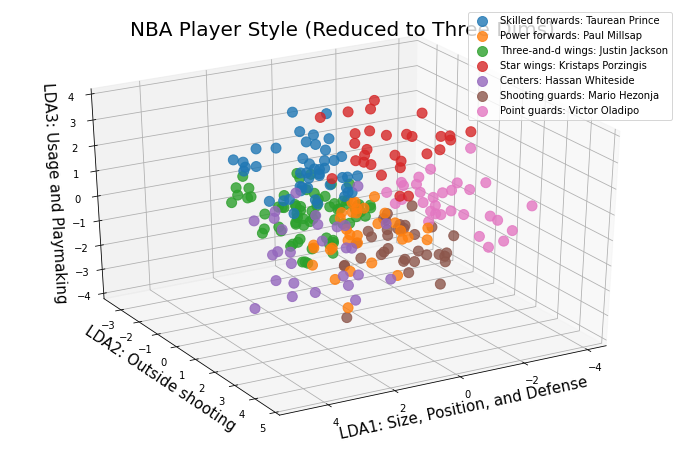

In [43]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111, projection='3d')

ax.set_title('NBA Player Style (Reduced to Three Dims)', size=20)

ax.set_xlabel('LDA1: Size, Position, and Defense', size=15)

ax.set_ylabel('LDA2: Outside shooting', size=15)

ax.set_zlabel('LDA3: Usage and Playmaking', size=15)

handles = []

for cluster in range(num_clusters_2):

    handles.append(cluster)

    tmp_df = reduced_df[reduced_df['Cluster_2'] == cluster]

    ax.scatter(tmp_df['LDA1'], tmp_df['LDA2'], tmp_df['LDA3'], label=cluster, s=100, alpha=0.8)

ax.legend(cluster_and_player)

ax.view_init(30,60)

ax.grid()
    
plt.show()

Note the axes are given descriptions only to aid in viewing. The axes are some low-dimensional mixture of these higher order skills/talents. The descriptive names are simple what the axes *appear* to be showing.

### 6.2 Graph Clusters in 2D

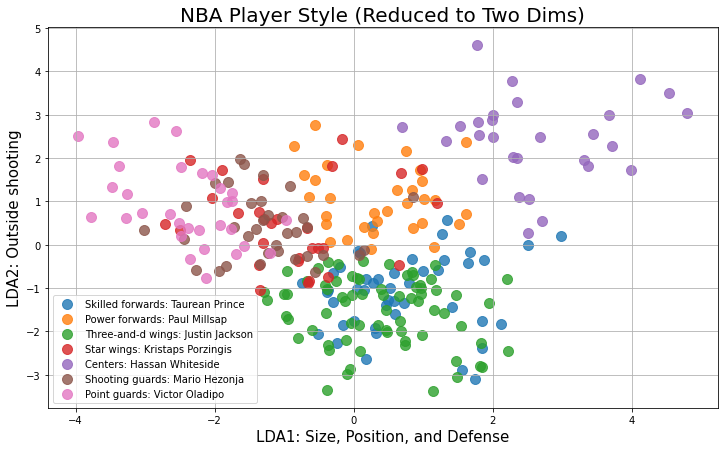

In [44]:
import matplotlib.pyplot as plt

# cmap = plt.cm.get_cmap('jet', reduced_df['Cluster_2'].nunique())

fig, ax = plt.subplots(figsize=(12,7))

ax.set_title('NBA Player Style (Reduced to Two Dims)', size=20)

ax.set_xlabel('LDA1: Size, Position, and Defense', size=15)

ax.set_ylabel('LDA2: Outside shooting', size=15)

handles = []

for cluster in range(num_clusters_2):
    
    handles.append(cluster)
    
    tmp_df = reduced_df[reduced_df['Cluster_2'] == cluster]
    
    ax.scatter(tmp_df['LDA1'], tmp_df['LDA2'], label=cluster, s=100, alpha=0.8)

ax.legend(cluster_and_player)

ax.grid()

plt.show()

### 7.0 Input Player to Get Comps

In [45]:
# Input player name:

player_name = input('Player name: ')

# Retrieve index of player name:

index = reduced_df['Player'].tolist().index(f'{player_name}')

# Pull player's stats:

player_stats = reduced_df.iloc[index,:]

player_stats = np.asarray(player_stats)

Player name: Mario Hezonja


### 7.1 Input Player You Would Like to Compare

In [46]:
comp_name = input('Comp player name: ')

comp_index = reduced_df['Player'].tolist().index(f'{comp_name}')

comp_stats = reduced_df.iloc[comp_index,:]

comp_stats = np.asarray(comp_stats)

Comp player name: Kristaps Porzingis


### 7.2 Calculate Dissimilarity

In [47]:
total_player_diff = []

for player in reduced_df['Player']:
    
    new_index = reduced_df['Player'].tolist().index(player)
    
    player_stats_tmp = np.asarray(reduced_df.iloc[new_index,:])
    
    sub_player_diff = []
    
    for i in range(len(reduced_df)):
        
        lda1, lda2, lda3 = player_stats_tmp[-4], player_stats_tmp[-3], player_stats_tmp[-2]
        ilda1, ilda2, ilda3 = reduced_df['LDA1'][i], reduced_df['LDA2'][i], reduced_df['LDA3'][i]
        total_1 = lda1 - ilda1
        total_2 = lda2 - ilda2
        total_3 = lda3 - ilda3
        l2_norm = np.sqrt((total_1 ** 2) + (total_2 ** 2) + (total_3 ** 2))
        
        sub_player_diff.append(l2_norm)
    
    sub_mean = np.mean(sub_player_diff)
    
    total_player_diff.append(sub_mean)

total_mean, total_std = np.mean(total_player_diff), np.std(total_player_diff)

### 6.3 Calculate L2-Norms

In [48]:
# Loop through and create a list of L2-Norms:

player_diff = []

for i in range(len(reduced_df)):
    
    lda1, lda2, lda3 = player_stats[-4], player_stats[-3], player_stats[-2]
    ilda1, ilda2, ilda3 = reduced_df['LDA1'][i], reduced_df['LDA2'][i], reduced_df['LDA3'][i]
    total_1 = lda1 - ilda1
    total_2 = lda2 - ilda2
    total_3 = lda3  - ilda3
    l2_norm = np.sqrt((total_1 ** 2) + (total_2 ** 2) + (total_3 ** 2))
    player_diff += [(i,l2_norm)]

# And for just Target Comp:

lda1, lda2, lda3 = player_stats[-4], player_stats[-3], player_stats[-2]
ilda1, ilda2, ilda3 = comp_stats[-4], comp_stats[-3], comp_stats[-2]
total_1 = lda1 - ilda1
total_2 = lda2 - ilda2
total_3 = lda3 - ilda3
l2_norm = np.sqrt((total_1 ** 2) + (total_2 ** 2) + (total_3 ** 2))
target_comp = l2_norm

### 6.4 Calculate Comps

In [49]:
# Initialize:

comp_1, it_1, comp_2, it_2, comp_3, it_3 = [x + 3 for x in np.zeros(6)]

# 1. Best Comp:

for i in range(len(player_diff)):
    if (player_diff[i][1] < comp_1) and (player_diff[i][1] > 0):
        comp_1 = player_diff[i][1]
        it_1 = i

# 2. Second Comp:

for i in range(len(player_diff)):
    if (player_diff[i][1] < comp_2) and (player_diff[i][1] > comp_1):
        comp_2 = player_diff[i][1]
        it_2 = i

# 3. Third Comp:

for i in range(len(player_diff)):
    if (player_diff[i][1] < comp_3) and (player_diff[i][1] > comp_1) and (player_diff[i][1] > comp_2):
        comp_3 = player_diff[i][1]
        it_3 = i

In [50]:
# Dissimilarity (dissim_factor) calculation to add to final comp_df:

dissimilarity = 0

for i in range(len(player_diff)):
    
    dissimilarity += player_diff[i][1]

dissimilarity = dissimilarity / len(player_diff)

dissim_factor = (dissimilarity - total_mean) / total_std

### 7.0 Player Comp Df

In [51]:
player_stat_array = np.array(reduced_df.iloc[index,1:]).reshape(1,-1)

player_stat_array = np.vstack((player_stat_array, np.array(reduced_df.iloc[it_1, 1:]).reshape(1,-1)))

player_stat_array = np.vstack((player_stat_array, np.array(reduced_df.iloc[it_2, 1:]).reshape(1,-1)))

player_stat_array = np.vstack((player_stat_array, np.array(reduced_df.iloc[it_3, 1:]).reshape(1,-1)))

player_stat_array = np.vstack((player_stat_array, np.array(reduced_df.iloc[comp_index, 1:]).reshape(1,-1)))

# player_comp_df['Top Comp'] = reduced_df.iloc[it_1,1:]
# player_comp_df['Second-Best Comp'] = reduced_df.iloc[it_2,1:]
# player_comp_df['Third-Best Comp'] = reduced_df.iloc[it_3,1:]
# player_comp_df['Target Comp'] = reduced_df.iloc[comp_index,1:]

In [52]:
player_stat_array.shape

(5, 29)

In [53]:
comp_df = pd.DataFrame(player_stat_array)

list_of_columns = list(total_df.columns.drop('Player')) + [f'PCA{i}' for i in range(n_components)] \
+ ['Cluster', 'LDA1', 'LDA2', 'LDA3','Cluster_2']

comp_df.columns = list_of_columns

comp_df['Player'] = [reduced_df.iloc[index,0], reduced_df.iloc[it_1,0], reduced_df.iloc[it_2,0],
                     reduced_df.iloc[it_3,0], reduced_df.iloc[comp_index,0]]

In [54]:
player_subject = pd.Series(scaled_vectors[index, :].reshape(-1))

comp_a = pd.Series(scaled_vectors[it_1, :])
comp_b = pd.Series(scaled_vectors[it_2, :])
comp_c = pd.Series(scaled_vectors[it_3, :])
comp_target = pd.Series(scaled_vectors[comp_index, :])

scaled_array = np.array([player_subject, comp_a, comp_b, comp_c, comp_target])

new_columns = ['sPos', 'sAge', 'sTS%', 's3PAr', 'sFTr', 'sORB%', 'sDRB%', 'sAST%', 'sTOV%', 
               'sUSG%', 'sSTL%', 'sBLK%', 'sDBPM', 'sDRAY']

for i, column in enumerate(new_columns):
    comp_df[column] = [round(scaled_array[x][i], 2) for x in range(5)]

In [55]:
comp_df['Similarity Score'] = [1, round(1 - comp_1/dissimilarity, 3), round(1 - comp_2/dissimilarity, 3), 
                               round(1 - comp_3/dissimilarity, 3), round(1 - target_comp/dissimilarity, 3)]

In [56]:
keep_columns = comp_df.columns

keep_columns = ['Player', 'Pos', 'Age', 'sPos', 'sAge', 'sTS%', 's3PAr',
       'sFTr', 'sORB%', 'sDRB%', 'sAST%', 'sTOV%', 'sUSG%', 'sSTL%', 'sBLK%', 'sDBPM', 'sDRAY',
       'Similarity Score', 'Cluster_2']

comp_df = comp_df[keep_columns]

comp_df.columns = ['Player', 'Pos', 'Age', 'sPos', 'sAge', 'sTS%', 's3PAr',
       'sFTr', 'sORB%', 'sDRB%', 'sAST%', 'sTOV%', 'sUSG%', 'sSTL%', 'sBLK%', 'sDBPM', 'sDRAY',
       'Similarity', 'Cluster_2']

comp_df['sDRAY'] = comp_df['sDRAY'].apply(lambda x: round(x,2))

### 7.1 DataFrame with Comps and Selected Player

In [57]:
comp_df

,Player,Pos,Age,sPos,sAge,sTS%,s3PAr,sFTr,sORB%,sDRB%,sAST%,sTOV%,sUSG%,sSTL%,sBLK%,sDBPM,sDRAY,Similarity,Cluster_2
0,Mario Hezonja,3,22.5,0.11,-0.55,-0.86,-0.86,0.15,-0.40,-0.53,0.33,-0.50,0.25,0.09,1.48,-0.47,0.06,1.000,5
1,Tyler Johnson,1,25.75,-1.33,-0.87,-0.11,-0.59,0.67,-0.11,-0.54,-0.80,0.02,-0.50,-0.37,0.13,-0.17,0.13,0.881,5
2,Kent Bazemore,2,28.5,-0.61,0.03,0.53,-0.71,0.36,0.24,-0.71,-0.18,0.17,0.97,0.40,1.95,0.33,0.56,0.818,5
3,Josh Okogie,2,20,-0.61,0.12,-1.44,-1.58,0.38,0.66,-0.55,-0.71,-0.92,-0.78,-0.90,1.58,-0.08,0.38,0.812,5
4,Kristaps Porzingis,4,22,0.82,-0.30,-0.98,-0.42,-0.52,0.56,-0.00,0.44,-1.00,-1.23,2.07,-0.85,3.26,-0.07,0.087,3
